## Q1 Kmeans clustering: We will now examine unsupervised learning for classification on a data set of chemical compounds

### (a) (3pt) Rescale features to a value between 0 and 1 and visualize

/Users/sbeur1/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/sbeur1/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/sbeur1/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/sbeur1/opt/miniconda3/lib/python3.8/site-packages/seaborn/distribu

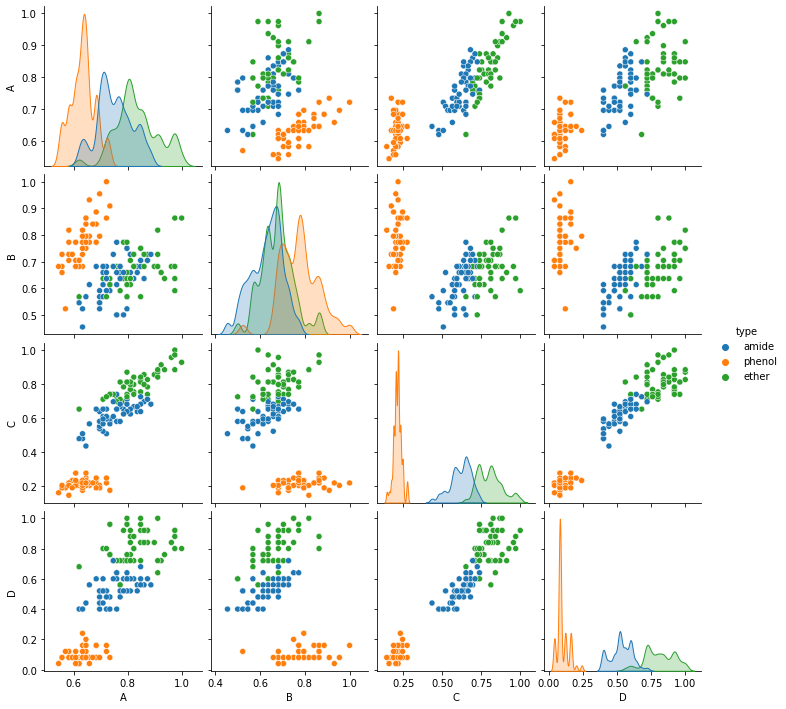

In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv("~/Downloads/compounds.csv")
df2 = df.drop(["type"],axis=1)
df2 = df2/df2.max()
norm = df2.values
compounds = df["type"]

df2["type"] = df["type"]
df2
sns.pairplot(df2.iloc[:,:],hue="type",diag_kws={'bw': 0.2})

#### Looking at the diagonals from the pairplot, C and D seem strongly correlated by the similarities in the graph peaks and distributions. Features A and B do not seem to have a strong correlation and it is at best a weak correlation.

### (b) (4pt) Do KMeans clustering with K=2,3 and 4 clusters. Visualize your result (you can select 2 features to do visualization)

In [221]:
from scipy.spatial.distance import pdist,cdist
import warnings

class KMeans():
    def __init__(self, K, maximum_iters=100):
        # K: number of clusters to be created
        # distance matrix is Eucledian distance
        self.K = K
        self.maximum_iters = maximum_iters
    
    def cluster(self, input_points, correction = True):
        """ Do KMeans clustering
        input_points: np.array shape(ndata,nfeatures). 
            Each feature is assumed to be normalized within range of [0,1]
        """
        centroids = np.random.random((self.K, input_points.shape[1]))
        assignments = np.zeros(input_points.shape[0])
        new_assignments = self.create_new_assignments(centroids, input_points)
        
        # restart if run into bad initialization
        # Comment out this part for Q1.(d)
        if (correction == True) and (len(np.unique(new_assignments))<self.K):
            return self.cluster(input_points)
        
        n_iters = 1
        while (new_assignments != assignments).any() and n_iters < self.maximum_iters:
            centroids = np.array([np.mean(input_points[new_assignments == k], axis=0) for k in range(self.K)])
            assignments = new_assignments
            new_assignments = self.create_new_assignments(centroids, input_points)
            if len(np.unique(new_assignments))< self.K:
                warnings.warn('At least one centroid vanishes')
            n_iters += 1
            if n_iters == self.maximum_iters:
                print("Warning: Maximum number of iterations reached!")
                
        return new_assignments
            
        
    def create_new_assignments(self, centroids, data_points):
        """ Assign each datapoint to its nearest centroid.
        centroid: 2d array of the current centroid for each cluster
        data_points: 2d arrays recording the features of each data point.
        """
        # distances stores the Eucledian distances between each datapoints and the centroid
        distances = cdist(data_points,centroids) #shape (ndata,ncentroid)
        new_assignments = np.argmin(distances, axis=-1)
        return new_assignments
        

In [222]:
two = KMeans(2)
three = KMeans(3)
four = KMeans(4)

result2 = two.cluster(norm)
result3 = three.cluster(norm)
result4 = four.cluster(norm)

twodf = pd.DataFrame(result2,columns=["two"])
threedf = pd.DataFrame(result3,columns=["three"])
fourdf = pd.DataFrame(result4,columns=["four"])

#end = pd.concat(df2,twodf,threedf,fourdf)
df2["result2"] = twodf
df2["result3"] = threedf
df2["result4"] = fourdf

df2



,A,B,C,D,type,result2,result3,result4
0,0.810127,0.659091,0.623188,0.52,amide,0,2,3
1,0.721519,1.000000,0.217391,0.16,phenol,1,0,2
2,0.848101,0.681818,0.753623,0.92,ether,0,1,0
3,0.734177,0.636364,0.739130,0.96,ether,0,1,0
4,0.810127,0.727273,0.768116,0.92,ether,0,1,0
...,...,...,...,...,...,...,...,...
145,0.683544,0.886364,0.188406,0.16,phenol,1,0,2
146,0.797468,0.568182,0.724638,0.76,ether,0,1,1
147,0.759494,0.772727,0.652174,0.64,amide,0,2,1
148,0.784810,0.659091,0.623188,0.52,amide,0,2,3


/Users/sbeur1/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/sbeur1/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/sbeur1/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/sbeur1/opt/miniconda3/lib/python3.8/site-packages/seaborn/distribu

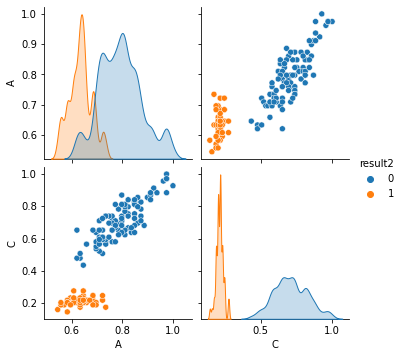

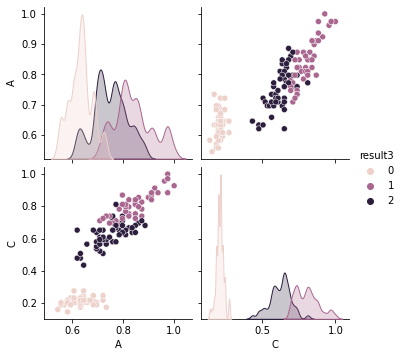

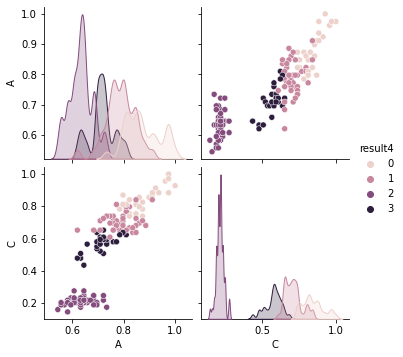

In [223]:
sns.pairplot(df2.iloc[:,[0,2,5]],hue="result2",diag_kws={'bw': 0.2})
sns.pairplot(df2.iloc[:,[0,2,6]],hue="result3",diag_kws={'bw': 0.2})
sns.pairplot(df2.iloc[:,[0,2,7]],hue="result4",diag_kws={'bw': 0.2})

#### According to the pairplots, 2 clusters makes the most sense to me because the most dissimilarity exists between the two clusters for K=2 and the two adjacent clusters for K=3 could be interpreted as overfitting.

### (c) (2pt) For K=3 clustering result, compare it to the true data label. How good is the classification?

In [224]:
def validate(y_hat,y):
    """print accuracy of prediction for each class for the compounds dataset
    yhat: np.array shape(ndata). Your prediction of classes
    y: np.array of str shape(ndata). data labels / groudn truths.
    """
    # correct classification
    compounds = np.unique(y) # should be ['amide','phenol','ether'] for compounds dataset
    clusters =[np.where((y==c)) for c in compounds]
    pred_class = np.unique(y_hat)
    
    #remove -1 for noise point in DBSCAN
    pred_class= np.delete(pred_class,np.where(pred_class==-1))
    assert len(pred_class) == len(compounds), f'y_hat has less or more than {len(compounds)} classes:{pred_class}'

    for i in range(3):
        #loop over solutions
        counts=[]
        scores=[]
        for j in range(3):
            #loop over clusters of true assignments
            sol_i= np.where((y_hat==pred_class[i]))
            counts.append(len(np.intersect1d(sol_i, clusters[j])))
            scores.append(counts[-1]/len(clusters[j]))
        idx = np.argmax(scores)
        print(f'Class {pred_class[i]} - {compounds[idx]}: {counts[idx]} out \
of {np.count_nonzero(clusters[idx])} are classified correctly')


validate(result3,compounds)

Class 0 - phenol: 50 out of 50 are classified correctly
Class 1 - ether: 46 out of 50 are classified correctly
Class 2 - amide: 48 out of 49 are classified correctly


### The classification seems very good, with an average accuracy of around 97%

## (d) (2pt) Comment out the part of the code that reinitialize the centroid if the initial assignment is not good.

In [225]:
for i in range(5):
    print(four.cluster(norm, False))

[2 1 0 0 0 1 3 0 2 0 3 0 1 0 1 1 3 0 3 1 1 3 3 3 1 0 1 1 1 3 0 1 0 1 3 2 1
 3 3 1 2 2 0 3 1 2 0 3 3 0 1 2 0 0 0 3 0 3 0 1 1 2 1 3 0 1 3 1 3 2 1 1 3 3
 2 1 3 2 3 2 2 1 1 2 3 3 3 2 2 3 2 3 1 1 1 1 3 0 3 1 2 3 2 3 3 1 1 1 1 3 0
 1 1 2 2 0 1 1 1 3 1 1 1 3 0 0 3 2 0 1 0 2 3 2 0 0 1 3 1 2 0 1 2 1 3 1 3 3
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[3 0 2 2 2 1 3 2 3 2 3 2 0 2 1 1 2 2 3 1 0 2 3 2 0 2 1 1 0 2 2 0 2 0 3 3 1
 2 3 1 3 3 2 2 0 3 2 2 2 2 1 3 2 2 2 3 2 3 2 1 1 3 1 3 2 0 3 0 3 3 0 0 3 2
 3 1 2 3 3 3 3 1 0 3 2 3 3 3 3 3 3 2 0 1 0 0 2 2 2 0 3 3 3 3 3 1 1 0 0 3 2
 1 0 3 3 2 1 0 0 2 0 0 0 3 2 2 2 3 2 1 2 3 2 3 2 2 1 3 0 3 2 0 3 1 3 0 2 3
 3 3]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

/Users/sbeur1/opt/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/sbeur1/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/var/folders/lp/p_fjrj654p734sb65s21gfcm0000gp/T/ipykernel_11693/1888802902.py:31: UserWarning: At least one centroid vanishes
  warnings.warn('At least one centroid vanishes')


### I added an argument to the function to specify whether or not to reinitialize the centroid if it isn't good -- for this question I set it to False. In some cases, the function returned just one cluster, which happens when one of the initial centroids is closer to all the points than the other three, resulting in one cluster being returned. Solutions could include rerunning the algorithm on a loop until four clusters are obtained, or intelligently randomizing the initial centroids such that one is not closest to all points,

## Q2 DBSCAN

### (a) Use DBSCAN to classify compounds dataset. Adjust the Rcut and MinPts hyperparameters so that we have 3 clusters. How

DBSCAN Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN

Here's how you can use DBSCAN:

In [227]:
from sklearn.cluster import DBSCAN

#0.1, 10
0.3,25
for x in range (5, 50, 5):
    for y in range(0, 40, 2):
        db = DBSCAN(eps=x/100,min_samples=y)
        #db = DBSCAN(eps=x/100, min_samples=y)
        clustering = db.fit(norm)
        # Cluster labels for each point in the dataset given to fit().  Noisy samples are given the label -1.
        labels = clustering.labels_
        # Indices of core samples.
        clustering.core_sample_indices_
        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        if -1 in set(labels) and 2 in set(labels) and 3 not in set(labels):
            print(x, y, labels)


5 4 [-1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1  0  0 -1 -1 -1  0  0  1 -1 -1
 -1 -1  0  0 -1 -1 -1  0 -1 -1 -1 -1  0  1 -1 -1 -1 -1 -1  1  0  2 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0 -1  0 -1 -1  0 -1 -1 -1  2 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1  0  0  0  0 -1 -1  0  0 -1 -1 -1  0  0 -1 -1
  0  0  0 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  2 -1 -1  0 -1 -1  2 -1  0  2  0
 -1 -1 -1 -1 -1  2]
15 2 [ 0  1  0  0  0  1 -1  0  0  0  0  0  1  0  1  1  0  0  0  1  1  0  0  0
  1  0  1  1  1  0  0  1  0  1  0  0  1  0  0  1  0  0  0  0  1  0  0  0
  0  0  1  0  0  0  0  0  0  0  0  1  1  0  1  0  0  1  0  1  0  0  1  1
  0  0  0  1  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  1  1  1  1
  0  0  0  1  0  0  0  0  0  1  1  1  1  0  0  1  1  0  0  0  1  1  1  0
  1  1  1  0  2  2  0  0  0  1  0  0  0  0  0  0  1  0  1  0  0  1  0  1
  0  1  0  0  0  0]


Used for loops to find optimal parameters for three clusters.

In [228]:
db = DBSCAN(eps=0.15, min_samples=2)
clustering = db.fit(norm)
# Cluster labels for each point in the dataset given to fit().  Noisy samples are given the label -1.
labels = clustering.labels_
# Indices of core samples.
clustering.core_sample_indices_


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# getting number of core and border point that belong to each class
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
print("labels: ",labels,"set:",np.unique(labels))
for i in range(n_clusters_+1):
    clst = np.unique(labels)[i]
    if clst ==-1:
        continue
    npoints = len(labels[labels==clst])
    core_samples=labels[core_samples_mask]
    ncorepts = len(core_samples[core_samples==clst])
    print(f'Class {clst} -- Number of core point: {ncorepts}, Number of border points: {npoints-ncorepts}')


labels:  [ 0  1  0  0  0  1 -1  0  0  0  0  0  1  0  1  1  0  0  0  1  1  0  0  0
  1  0  1  1  1  0  0  1  0  1  0  0  1  0  0  1  0  0  0  0  1  0  0  0
  0  0  1  0  0  0  0  0  0  0  0  1  1  0  1  0  0  1  0  1  0  0  1  1
  0  0  0  1  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  1  1  1  1
  0  0  0  1  0  0  0  0  0  1  1  1  1  0  0  1  1  0  0  0  1  1  1  0
  1  1  1  0  2  2  0  0  0  1  0  0  0  0  0  0  1  0  1  0  0  1  0  1
  0  1  0  0  0  0] set: [-1  0  1  2]
Class 0 -- Number of core point: 97, Number of border points: 0
Class 1 -- Number of core point: 50, Number of border points: 0
Class 2 -- Number of core point: 2, Number of border points: 0


In [229]:
rate = validate(labels,compounds)
#dbscan = pd.DataFrame(result4,columns=["dbscan"])
#df2["dbscan"] = dbscan
#sns.pairplot(df2.iloc[:,[0,2,-1]],hue="dbscan",diag_kws={'bw': 0.2})
#df2

Class 0 - amide: 50 out of 49 are classified correctly
Class 1 - phenol: 50 out of 50 are classified correctly
Class 2 - ether: 2 out of 50 are classified correctly


### We get 149 core points, 0 border points and 1 noise point. This is probably because two of the clusters in the dataset are pretty dense and near each other, and DBSCAN is not able to differentiate them based on the parameters I obtained. The algorithm got around a 33% accuracy, making it worse than K-means clustering for this dataset.

### (b) (3pt) Let’s work on the noisy moon dataset

Here's the noisy moon dataset!

,x,y
0,0.496271,-0.342753
1,-0.166300,0.922342
2,0.718956,0.665290
3,-0.337840,0.912074
4,0.103768,0.116946
...,...,...
1495,1.869998,-0.016190
1496,-0.433127,0.809947
1497,1.909509,0.029897
1498,0.546231,-0.360031


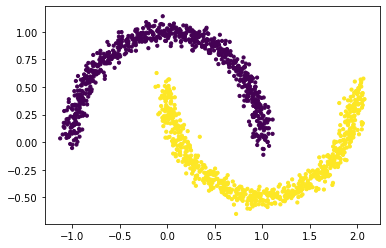

In [230]:
from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from pylab import *

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
# print(noisy_moons)
X,y=noisy_moons
plt.scatter(X[:, 0], X[:, 1], s=10,c=y)
x = X[:, 0]
y = X[:, 1]
new = pd.DataFrame(X, columns= ['x','y'])
new

In [231]:
for x in range (5, 50, 5):
    for y in range(0, 100, 5):
        db = DBSCAN(eps=x/100,min_samples=y)
        #db = DBSCAN(eps=x/100, min_samples=y)
        clustering = db.fit(new)
        # Cluster labels for each point in the dataset given to fit().  Noisy samples are given the label -1.
        labels = clustering.labels_
        # Indices of core samples.
        clustering.core_sample_indices_
        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        if -1 in set(labels) and 1 in set(labels) and 2 not in set(labels) and 3 not in set(labels):
            print(x, y, labels)

10 5 [0 1 1 ... 0 0 0]
10 10 [0 1 1 ... 0 0 0]
10 15 [0 1 1 ... 0 0 0]
10 20 [0 1 1 ... 0 0 0]
10 25 [0 1 1 ... 0 0 0]
10 30 [0 1 1 ... 0 0 0]
10 35 [0 1 1 ... 0 0 0]
15 40 [0 1 1 ... 0 0 0]
15 45 [0 1 1 ... 0 0 0]
15 50 [0 1 1 ... 0 0 0]
15 55 [0 1 1 ... 0 0 0]
15 60 [0 1 1 ... 0 0 0]
20 55 [0 1 1 ... 0 0 0]
20 60 [0 1 1 ... 0 0 0]
20 65 [0 1 1 ... 0 0 0]
20 70 [0 1 1 ... 0 0 0]
20 75 [0 1 1 ... 0 0 0]
20 80 [0 1 1 ... 0 0 0]
20 85 [0 1 1 ... 0 0 0]
20 90 [0 1 1 ... 0 0 0]
25 95 [0 1 1 ... 0 0 0]


In [232]:
db = DBSCAN(eps=0.1, min_samples=5)
clustering = db.fit(new)
# Cluster labels for each point in the dataset given to fit().  Noisy samples are given the label -1.
labels = clustering.labels_
# Indices of core samples.
clustering.core_sample_indices_


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# getting number of core and border point that belong to each class
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
print("labels: ",labels,"set:",np.unique(labels))
for i in range(n_clusters_+1):
    clst = np.unique(labels)[i]
    if clst ==-1:
        continue
    npoints = len(labels[labels==clst])
    core_samples=labels[core_samples_mask]
    ncorepts = len(core_samples[core_samples==clst])
    print(f'Class {clst} -- Number of core point: {ncorepts}, Number of border points: {npoints-ncorepts}')

labels:  [0 1 1 ... 0 0 0] set: [-1  0  1]
Class 0 -- Number of core point: 745, Number of border points: 3
Class 1 -- Number of core point: 749, Number of border points: 1


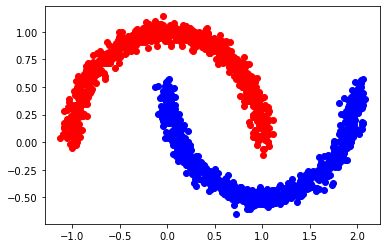

In [233]:
import matplotlib.pyplot as plt
for i in range(len(labels)):
    if labels[i] == 0:
        plt.plot(X[i, 0], X[i, 1], 'o', color = 'blue')
    if labels[i] == 1:
        plt.plot(X[i, 0], X[i, 1],'o', color = 'red')
plt.show()

In [240]:
two = KMeans(2)
newdf = new.values
result5 = two.cluster(newdf)
new["k"] = result5
new

,x,y,k
0,0.496271,-0.342753,0
1,-0.166300,0.922342,1
2,0.718956,0.665290,0
3,-0.337840,0.912074,1
4,0.103768,0.116946,1
...,...,...,...
1495,1.869998,-0.016190,0
1496,-0.433127,0.809947,1
1497,1.909509,0.029897,0
1498,0.546231,-0.360031,0


/Users/sbeur1/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/sbeur1/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


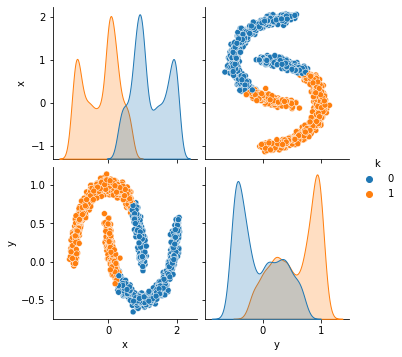

In [242]:
sns.pairplot(new.iloc[:,[0,1, 2]],hue="k",diag_kws={'bw': 0.2})


### DBSCAN is much better at clustering this dataset compared to K-means clustering